In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/home/vatsal/Downloads/HistoricalQuotes.csv")

In [4]:
data = data.iloc[1:,:]

In [140]:
data = data.sort_values(by='date')

In [141]:
data.shape

(1077, 6)

In [142]:
data = data['open']   

In [143]:
train_data = data.iloc[:-30].values
test_data = data.iloc[-30:].values

# For one timestamp

In [144]:
train_data = train_data.reshape(len(train_data),1)

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
mms = MinMaxScaler()

In [147]:
train_data = mms.fit_transform(train_data)

/home/vatsal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [148]:
train_data = train_data.reshape(len(train_data),1,1)

In [149]:
train_data.shape

(1047, 1, 1)

In [150]:
x_train = train_data[0:1046]

In [151]:
y_train = train_data[1:1047]

In [152]:
test_data.shape


(30,)

In [153]:
y_train = y_train.reshape(len(y_train),1)

In [154]:
from keras.models import Sequential

In [155]:
from keras.layers import Dense

In [156]:
from keras.layers import LSTM

In [157]:
myreg = Sequential()

In [158]:
myreg.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [159]:
myreg.add(Dense(units=1))

In [160]:
myreg.compile(optimizer='adam',loss='mean_squared_error')

In [161]:
myreg.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1046/1046 [==============================] - 0s - loss: 0.1815     
Epoch 2/200
1046/1046 [==============================] - 0s - loss: 0.1386     
Epoch 3/200
1046/1046 [==============================] - 0s - loss: 0.1097     
Epoch 4/200
1046/1046 [==============================] - 0s - loss: 0.0918     
Epoch 5/200
1046/1046 [==============================] - 0s - loss: 0.0816     
Epoch 6/200
1046/1046 [==============================] - 0s - loss: 0.0760     
Epoch 7/200
1046/1046 [==============================] - 0s - loss: 0.0730     
Epoch 8/200
1046/1046 [==============================] - 0s - loss: 0.0714     
Epoch 9/200
1046/1046 [==============================] - 0s - loss: 0.0703     
Epoch 10/200
1046/1046 [==============================] - 0s - loss: 0.0695     
Epoch 11/200
1046/1046 [==============================] - 0s - loss: 0.0688     
Epoch 12/200
1046/1046 [==============================] - 0s - loss: 0.0680     
Epoch 13/200
1046/1046 [=============

1046/1046 [==============================] - 0s - loss: 2.8550e-04     
Epoch 196/200
1046/1046 [==============================] - 0s - loss: 2.7972e-04     
Epoch 197/200
1046/1046 [==============================] - 0s - loss: 2.7904e-04     
Epoch 198/200
1046/1046 [==============================] - 0s - loss: 2.7951e-04     
Epoch 199/200
1046/1046 [==============================] - 0s - loss: 2.8148e-04     
Epoch 200/200
1046/1046 [==============================] - 0s - loss: 2.8450e-04     


In [162]:
test_data = mms.transform(test_data.reshape(len(test_data),1))

In [163]:
test_data

array([[ 0.83564774],
       [ 0.85596473],
       [ 0.85599402],
       [ 0.83529619],
       [ 0.83257163],
       [ 0.83920724],
       [ 0.88577372],
       [ 0.91943517],
       [ 0.94676862],
       [ 0.9484971 ],
       [ 0.93260386],
       [ 0.91335618],
       [ 0.91397141],
       [ 0.93223765],
       [ 0.94695904],
       [ 0.95095799],
       [ 0.95829671],
       [ 0.95066503],
       [ 0.97241753],
       [ 0.99704107],
       [ 0.99636726],
       [ 0.97335501],
       [ 0.95059179],
       [ 0.92774067],
       [ 0.917985  ],
       [ 0.88978731],
       [ 0.91602215],
       [ 0.88526103],
       [ 0.93919552],
       [ 0.90215035]])

In [164]:
yp = myreg.predict(test_data.reshape(len(test_data),1,1))    

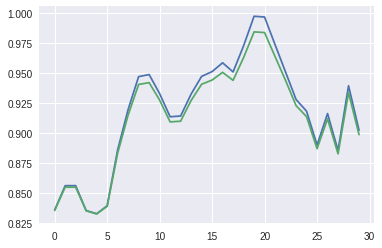

In [165]:
plt.plot(test_data)
plt.plot(yp)

In [166]:
from sklearn.metrics import mean_squared_error

In [167]:
mean_squared_error(test_data,yp)

3.7652478679315063e-05

In [168]:
test_data = mms.inverse_transform(test_data)
yp = mms.inverse_transform(yp)

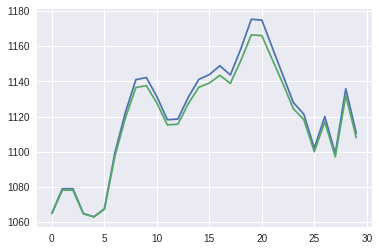

In [169]:
plt.plot(test_data)
plt.plot(yp)

# Taking 20 timestamps and one layer

In [190]:
train_data = data.iloc[:-30].values
test_data = data.iloc[-30:].values

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [192]:
mms = MinMaxScaler()
train_data = mms.fit_transform(train_data.reshape(len(train_data),1))

/home/vatsal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [193]:
import numpy as np
x_train = []
y_train = []
for i in range(20,len(train_data)):
    x_train.append(train_data[i-20:i])
    y_train.append(train_data[i])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [194]:
x_train.shape

(1027, 20, 1)

In [195]:
y_train.shape

(1027, 1)

In [196]:
x_train = x_train.reshape(1027,20,1)

In [197]:
x_train.shape

(1027, 20, 1)

In [198]:
y_train = y_train.reshape(1027,1)

In [199]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [200]:
myreg = Sequential()
myreg.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))
myreg.add(Dense(units=1))
myreg.compile(optimizer='adam',loss='mean_squared_error')

In [181]:
myreg.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1027/1027 [==============================] - 1s - loss: 0.1591     
Epoch 2/200
1027/1027 [==============================] - 0s - loss: 0.1045     
Epoch 3/200
1027/1027 [==============================] - 0s - loss: 0.0766     
Epoch 4/200
1027/1027 [==============================] - 0s - loss: 0.0645     
Epoch 5/200
1027/1027 [==============================] - 0s - loss: 0.0598     
Epoch 6/200
1027/1027 [==============================] - 0s - loss: 0.0577     
Epoch 7/200
1027/1027 [==============================] - 0s - loss: 0.0560     
Epoch 8/200
1027/1027 [==============================] - 0s - loss: 0.0544     
Epoch 9/200
1027/1027 [==============================] - 0s - loss: 0.0526     
Epoch 10/200
1027/1027 [==============================] - 0s - loss: 0.0507     
Epoch 11/200
1027/1027 [==============================] - 0s - loss: 0.0487     
Epoch 12/200
1027/1027 [==============================] - 0s - loss: 0.0466     
Epoch 13/200
1027/1027 [=============

1027/1027 [==============================] - 0s - loss: 4.5004e-04     
Epoch 192/200
1027/1027 [==============================] - 0s - loss: 4.4019e-04     
Epoch 193/200
1027/1027 [==============================] - 0s - loss: 4.3810e-04     
Epoch 194/200
1027/1027 [==============================] - 0s - loss: 4.3982e-04     
Epoch 195/200
1027/1027 [==============================] - 0s - loss: 4.4283e-04     
Epoch 196/200
1027/1027 [==============================] - 0s - loss: 4.4225e-04     
Epoch 197/200
1027/1027 [==============================] - 0s - loss: 4.3330e-04     
Epoch 198/200
1027/1027 [==============================] - 0s - loss: 4.3265e-04     
Epoch 199/200
1027/1027 [==============================] - 1s - loss: 4.3657e-04     
Epoch 200/200
1027/1027 [==============================] - ETA: 0s - loss: 4.2881e-0 - 1s - loss: 4.2909e-04     


In [205]:
test_data = mms.transform(test_data.reshape(len(test_data),1))

In [206]:
test_data

array([[ 0.83564774],
       [ 0.85596473],
       [ 0.85599402],
       [ 0.83529619],
       [ 0.83257163],
       [ 0.83920724],
       [ 0.88577372],
       [ 0.91943517],
       [ 0.94676862],
       [ 0.9484971 ],
       [ 0.93260386],
       [ 0.91335618],
       [ 0.91397141],
       [ 0.93223765],
       [ 0.94695904],
       [ 0.95095799],
       [ 0.95829671],
       [ 0.95066503],
       [ 0.97241753],
       [ 0.99704107],
       [ 0.99636726],
       [ 0.97335501],
       [ 0.95059179],
       [ 0.92774067],
       [ 0.917985  ],
       [ 0.88978731],
       [ 0.91602215],
       [ 0.88526103],
       [ 0.93919552],
       [ 0.90215035]])

In [184]:
x_test = []
y_test = []
for i in range(20,30):
    x_test.append(test_data[i-20:i])
    y_test.append(test_data[i])


In [185]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [186]:
x_test = x_test.reshape(10,20,1)

In [187]:
yp = myreg.predict(x_test)

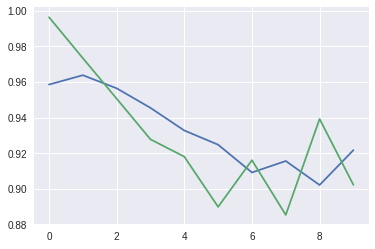

In [188]:
plt.plot(yp)
plt.plot(y_test)


In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,yp)

0.00060935113489422659

# for 60 training examples and four layers 

In [207]:
train_data.shape

(1047, 1)

In [208]:
train_data

array([[ 0.10744419],
       [ 0.09748345],
       [ 0.10581825],
       ..., 
       [ 0.8308578 ],
       [ 0.84872854],
       [ 0.86264428]])

In [209]:
test_data.shape

(30, 1)

In [210]:
test_data

array([[ 0.83564774],
       [ 0.85596473],
       [ 0.85599402],
       [ 0.83529619],
       [ 0.83257163],
       [ 0.83920724],
       [ 0.88577372],
       [ 0.91943517],
       [ 0.94676862],
       [ 0.9484971 ],
       [ 0.93260386],
       [ 0.91335618],
       [ 0.91397141],
       [ 0.93223765],
       [ 0.94695904],
       [ 0.95095799],
       [ 0.95829671],
       [ 0.95066503],
       [ 0.97241753],
       [ 0.99704107],
       [ 0.99636726],
       [ 0.97335501],
       [ 0.95059179],
       [ 0.92774067],
       [ 0.917985  ],
       [ 0.88978731],
       [ 0.91602215],
       [ 0.88526103],
       [ 0.93919552],
       [ 0.90215035]])

In [211]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train_data = mms.fit_transform(train_data.reshape(len(train_data),1))


In [212]:
train_data.shape

(1047, 1)

In [213]:
train_data


array([[ 0.10744419],
       [ 0.09748345],
       [ 0.10581825],
       ..., 
       [ 0.8308578 ],
       [ 0.84872854],
       [ 0.86264428]])

In [214]:
x_train = []
y_train =[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
x_train,y_train = np.array(x_train),np.array(y_train)

In [215]:
x_train.shape

(987, 60, 1)

In [216]:
y_train.shape

(987, 1)

In [217]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [218]:
myreg = Sequential()
myreg.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1),return_sequences=True))
myreg.add(LSTM(units=4,activation='sigmoid',return_sequences=True))
myreg.add(LSTM(units=4,activation='sigmoid',return_sequences=True))
myreg.add(LSTM(units=4,activation='sigmoid'))
myreg.add(Dense(units=1))
myreg.compile(optimizer='adam',loss='mean_squared_error')

In [219]:
myreg.fit(x_train,y_train)

Epoch 1/10
987/987 [==============================] - 6s - loss: 0.3411     
Epoch 2/10
987/987 [==============================] - 5s - loss: 0.2287     
Epoch 3/10
987/987 [==============================] - 5s - loss: 0.1534     
Epoch 4/10
987/987 [==============================] - 6s - loss: 0.1057     
Epoch 5/10
987/987 [==============================] - 5s - loss: 0.0810     
Epoch 6/10
987/987 [==============================] - 5s - loss: 0.0723     
Epoch 7/10
987/987 [==============================] - 5s - loss: 0.0702     
Epoch 8/10
987/987 [==============================] - 5s - loss: 0.0700     
Epoch 9/10
987/987 [==============================] - 5s - loss: 0.0699     
Epoch 10/10
987/987 [==============================] - 6s - loss: 0.0700     


In [220]:
test_data = mms.transform(test_data.reshape(len(test_data),1))